In [1]:
import os
from itertools import combinations

import matplotlib.pyplot as plt
from brokenaxes import brokenaxes
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import display

from utils.dlt import *
from utils.skeleton_keypoints import angle_keypoints_dict

output_dir = "pp"
os.makedirs(output_dir, exist_ok=True) 

In [8]:
data_num = 1

true_path = f"transformed_keypoints/hirasaki_{data_num}_true.csv"
df_true = pd.read_csv(true_path, index_col=0)

for axis in ["x", "y", "z"]:
    for key, value in dict(CENTER_SHOULDER=["RIGHT_SHOULDER", "LEFT_SHOULDER"], CENTER_HIP=["RIGHT_HIP", "LEFT_HIP"]).items():
        df_true[f"{key}_{axis}"] = (df_true[f"{value[0]}_{axis}"] + df_true[f"{value[1]}_{axis}"]) / 2

bad_path = f"transformed_keypoints/hirasaki_{data_num}_04_transformed.csv"
df_bad = pd.read_csv(bad_path, index_col=0)

for axis in ["x", "y", "z"]:
    for key, value in dict(CENTER_SHOULDER=["RIGHT_SHOULDER", "LEFT_SHOULDER"], CENTER_HIP=["RIGHT_HIP", "LEFT_HIP"]).items():
        df_bad[f"{key}_{axis}"] = (df_bad[f"{value[0]}_{axis}"] + df_bad[f"{value[1]}_{axis}"]) / 2

good1_path = f"transformed_keypoints/hirasaki_{data_num}_12_transformed.csv"
df_good1 = pd.read_csv(good1_path, index_col=0)

for axis in ["x", "y", "z"]:
    for key, value in dict(CENTER_SHOULDER=["RIGHT_SHOULDER", "LEFT_SHOULDER"], CENTER_HIP=["RIGHT_HIP", "LEFT_HIP"]).items():
        df_good1[f"{key}_{axis}"] = (df_good1[f"{value[0]}_{axis}"] + df_good1[f"{value[1]}_{axis}"]) / 2

good2_path = f"transformed_keypoints/hirasaki_{data_num}_123_transformed.csv"
df_good2 = pd.read_csv(good2_path, index_col=0)

for axis in ["x", "y", "z"]:
    for key, value in dict(CENTER_SHOULDER=["RIGHT_SHOULDER", "LEFT_SHOULDER"], CENTER_HIP=["RIGHT_HIP", "LEFT_HIP"]).items():
        df_good2[f"{key}_{axis}"] = (df_good2[f"{value[0]}_{axis}"] + df_good2[f"{value[1]}_{axis}"]) / 2

good3_path = f"transformed_keypoints/hirasaki_{data_num}_01234_transformed.csv"
df_good3 = pd.read_csv(good3_path, index_col=0)

for axis in ["x", "y", "z"]:
    for key, value in dict(CENTER_SHOULDER=["RIGHT_SHOULDER", "LEFT_SHOULDER"], CENTER_HIP=["RIGHT_HIP", "LEFT_HIP"]).items():
        df_good3[f"{key}_{axis}"] = (df_good3[f"{value[0]}_{axis}"] + df_good3[f"{value[1]}_{axis}"]) / 2

In [9]:
true_angle_dict = {}
for key, value in angle_keypoints_dict.items():
    a_column, b_column, c_column = value
    for frame in df_true.index:
        a = df_true.filter(like=a_column).loc[frame].values
        b = df_true.filter(like=b_column).loc[frame].values
        c = df_true.filter(like=c_column).loc[frame].values
        true_angle = calc_angle(a, b, c)
        if key not in true_angle_dict:
            true_angle_dict[key] = []
        true_angle_dict[key].append(true_angle)
df_true_angle = pd.DataFrame(true_angle_dict, index=df_true.index)

bad_angle_dict = {}
for key, value in angle_keypoints_dict.items():
    a_column, b_column, c_column = value
    for frame in df_bad.index:
        a = df_bad.filter(like=a_column).loc[frame].values
        b = df_bad.filter(like=b_column).loc[frame].values
        c = df_bad.filter(like=c_column).loc[frame].values
        bad_angle = calc_angle(a, b, c)
        if key not in bad_angle_dict:
            bad_angle_dict[key] = []
        bad_angle_dict[key].append(bad_angle)
df_bad_angle = pd.DataFrame(bad_angle_dict, index=df_bad.index)

good1_angle_dict = {}
for key, value in angle_keypoints_dict.items():
    a_column, b_column, c_column = value
    for frame in df_good1.index:
        a = df_good1.filter(like=a_column).loc[frame].values
        b = df_good1.filter(like=b_column).loc[frame].values
        c = df_good1.filter(like=c_column).loc[frame].values
        good1_angle = calc_angle(a, b, c)
        if key not in good1_angle_dict:
            good1_angle_dict[key] = []
        good1_angle_dict[key].append(good1_angle)
df_good1_angle = pd.DataFrame(good1_angle_dict, index=df_good1.index)

good2_angle_dict = {}
for key, value in angle_keypoints_dict.items():
    a_column, b_column, c_column = value
    for frame in df_good2.index:
        a = df_good2.filter(like=a_column).loc[frame].values
        b = df_good2.filter(like=b_column).loc[frame].values
        c = df_good2.filter(like=c_column).loc[frame].values
        good2_angle = calc_angle(a, b, c)
        if key not in good2_angle_dict:
            good2_angle_dict[key] = []
        good2_angle_dict[key].append(good2_angle)
df_good2_angle = pd.DataFrame(good2_angle_dict, index=df_good2.index)

good3_angle_dict = {}
for key, value in angle_keypoints_dict.items():
    a_column, b_column, c_column = value
    for frame in df_good3.index:
        a = df_good3.filter(like=a_column).loc[frame].values
        b = df_good3.filter(like=b_column).loc[frame].values
        c = df_good3.filter(like=c_column).loc[frame].values
        good3_angle = calc_angle(a, b, c)
        if key not in good3_angle_dict:
            good3_angle_dict[key] = []
        good3_angle_dict[key].append(good3_angle)
df_good3_angle = pd.DataFrame(good3_angle_dict, index=df_good3.index)

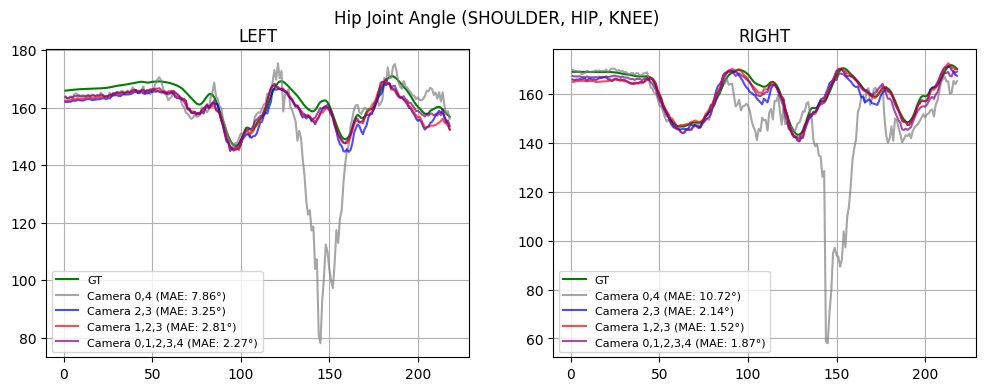

In [10]:
angle_name = "NKEE_UP_ANGLE"

fig, ax = plt.subplots(1, 2, figsize=(12, 4), sharex=True)
ax[0].plot(df_true_angle.index, df_true_angle[f"LEFT_{angle_name}"], label="GT", color="green")
ax[0].plot(df_bad_angle.index, df_bad_angle[f"LEFT_{angle_name}"], label=f"Camera 0,4 (MAE: {np.mean(np.abs(df_true_angle[f'LEFT_{angle_name}'] - df_bad_angle[f'LEFT_{angle_name}'])):.2f}°)", color="gray", alpha=0.7)
ax[0].plot(df_good1_angle.index, df_good1_angle[f"LEFT_{angle_name}"], label=f"Camera 2,3 (MAE: {np.mean(np.abs(df_true_angle[f'LEFT_{angle_name}'] - df_good1_angle[f'LEFT_{angle_name}'])):.2f}°)", color="blue", alpha=0.7)
ax[0].plot(df_good2_angle.index, df_good2_angle[f"LEFT_{angle_name}"], label=f"Camera 1,2,3 (MAE: {np.mean(np.abs(df_true_angle[f'LEFT_{angle_name}'] - df_good2_angle[f'LEFT_{angle_name}'])):.2f}°)", color="red", alpha=0.7)
ax[0].plot(df_good3_angle.index, df_good3_angle[f"LEFT_{angle_name}"], label=f"Camera 0,1,2,3,4 (MAE: {np.mean(np.abs(df_true_angle[f'LEFT_{angle_name}'] - df_good3_angle[f'LEFT_{angle_name}'])):.2f}°)", color="purple", alpha=0.7)
ax[0].set_title("LEFT") 
ax[0].legend(fontsize=8, loc='lower left')
ax[0].grid()

ax[1].plot(df_true_angle.index, df_true_angle[f"RIGHT_{angle_name}"], label="GT", color="green")
ax[1].plot(df_bad_angle.index, df_bad_angle[f"RIGHT_{angle_name}"], label=f"Camera 0,4 (MAE: {np.mean(np.abs(df_true_angle[f'RIGHT_{angle_name}'] - df_bad_angle[f'RIGHT_{angle_name}'])):.2f}°)", color="gray", alpha=0.7)
ax[1].plot(df_good1_angle.index, df_good1_angle[f"RIGHT_{angle_name}"], label=f"Camera 2,3 (MAE: {np.mean(np.abs(df_true_angle[f'RIGHT_{angle_name}'] - df_good1_angle[f'RIGHT_{angle_name}'])):.2f}°)", color="blue", alpha=0.7)
ax[1].plot(df_good2_angle.index, df_good2_angle[f"RIGHT_{angle_name}"], label=f"Camera 1,2,3 (MAE: {np.mean(np.abs(df_true_angle[f'RIGHT_{angle_name}'] - df_good2_angle[f'RIGHT_{angle_name}'])):.2f}°)", color="red", alpha=0.7)
ax[1].plot(df_good3_angle.index, df_good3_angle[f"RIGHT_{angle_name}"], label=f"Camera 0,1,2,3,4 (MAE: {np.mean(np.abs(df_true_angle[f'RIGHT_{angle_name}'] - df_good3_angle[f'RIGHT_{angle_name}'])):.2f}°)", color="purple", alpha=0.7)
ax[1].set_title("RIGHT")
ax[1].legend(fontsize=8, loc='lower left')
ax[1].grid()

plt.suptitle(f"Hip Joint Angle (SHOULDER, HIP, KNEE)")
plt.savefig(f"{output_dir}/hip_joint_angle.png")
plt.show()

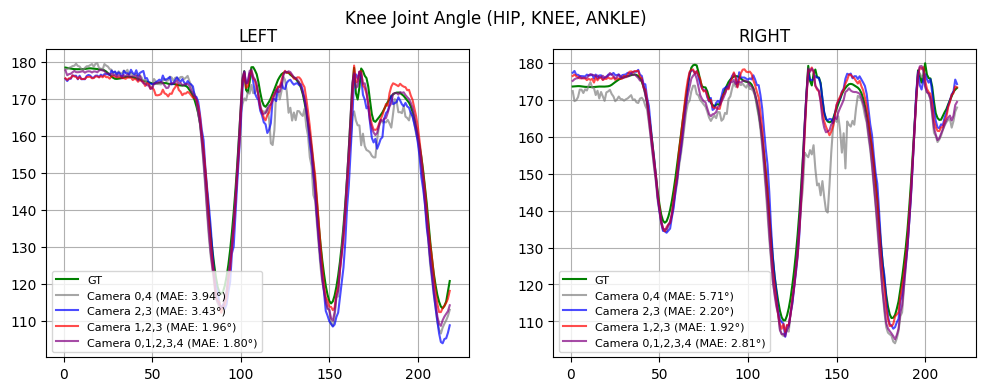

In [11]:
angle_name = "KNEE_ANGLE"

fig, ax = plt.subplots(1, 2, figsize=(12, 4), sharex=True)
ax[0].plot(df_true_angle.index, df_true_angle[f"LEFT_{angle_name}"], label="GT", color="green")
ax[0].plot(df_bad_angle.index, df_bad_angle[f"LEFT_{angle_name}"], label=f"Camera 0,4 (MAE: {np.mean(np.abs(df_true_angle[f'LEFT_{angle_name}'] - df_bad_angle[f'LEFT_{angle_name}'])):.2f}°)", color="gray", alpha=0.7)
ax[0].plot(df_good1_angle.index, df_good1_angle[f"LEFT_{angle_name}"], label=f"Camera 2,3 (MAE: {np.mean(np.abs(df_true_angle[f'LEFT_{angle_name}'] - df_good1_angle[f'LEFT_{angle_name}'])):.2f}°)", color="blue", alpha=0.7)
ax[0].plot(df_good2_angle.index, df_good2_angle[f"LEFT_{angle_name}"], label=f"Camera 1,2,3 (MAE: {np.mean(np.abs(df_true_angle[f'LEFT_{angle_name}'] - df_good2_angle[f'LEFT_{angle_name}'])):.2f}°)", color="red", alpha=0.7)
ax[0].plot(df_good3_angle.index, df_good3_angle[f"LEFT_{angle_name}"], label=f"Camera 0,1,2,3,4 (MAE: {np.mean(np.abs(df_true_angle[f'LEFT_{angle_name}'] - df_good3_angle[f'LEFT_{angle_name}'])):.2f}°)", color="purple", alpha=0.7)
ax[0].set_title("LEFT") 
ax[0].legend(fontsize=8, loc='lower left')
ax[0].grid()

ax[1].plot(df_true_angle.index, df_true_angle[f"RIGHT_{angle_name}"], label="GT", color="green")
ax[1].plot(df_bad_angle.index, df_bad_angle[f"RIGHT_{angle_name}"], label=f"Camera 0,4 (MAE: {np.mean(np.abs(df_true_angle[f'RIGHT_{angle_name}'] - df_bad_angle[f'RIGHT_{angle_name}'])):.2f}°)", color="gray", alpha=0.7)
ax[1].plot(df_good1_angle.index, df_good1_angle[f"RIGHT_{angle_name}"], label=f"Camera 2,3 (MAE: {np.mean(np.abs(df_true_angle[f'RIGHT_{angle_name}'] - df_good1_angle[f'RIGHT_{angle_name}'])):.2f}°)", color="blue", alpha=0.7)
ax[1].plot(df_good2_angle.index, df_good2_angle[f"RIGHT_{angle_name}"], label=f"Camera 1,2,3 (MAE: {np.mean(np.abs(df_true_angle[f'RIGHT_{angle_name}'] - df_good2_angle[f'RIGHT_{angle_name}'])):.2f}°)", color="red", alpha=0.7)
ax[1].plot(df_good3_angle.index, df_good3_angle[f"RIGHT_{angle_name}"], label=f"Camera 0,1,2,3,4 (MAE: {np.mean(np.abs(df_true_angle[f'RIGHT_{angle_name}'] - df_good3_angle[f'RIGHT_{angle_name}'])):.2f}°)", color="purple", alpha=0.7)
ax[1].set_title("RIGHT")
ax[1].legend(fontsize=8, loc='lower left')
ax[1].grid()

plt.suptitle(f"Knee Joint Angle (HIP, KNEE, ANKLE)")
plt.savefig(f"{output_dir}/knee_joint_angle.png")
plt.show()

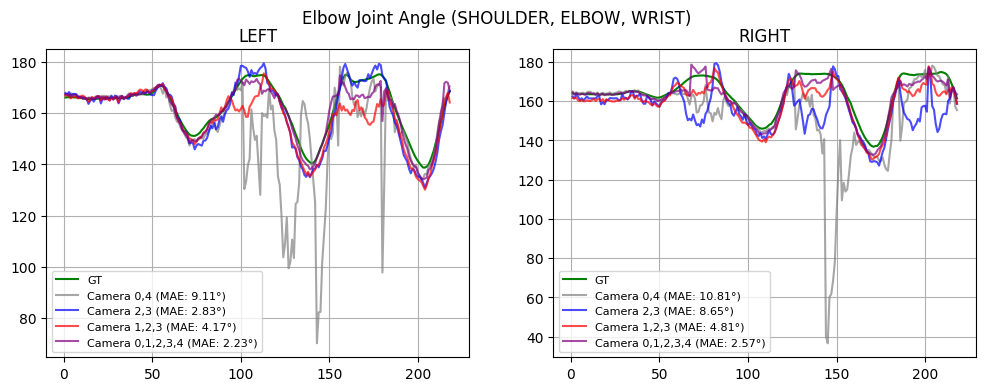

In [12]:
angle_name = "ELBOW_ANGLE"

fig, ax = plt.subplots(1, 2, figsize=(12, 4), sharex=True)
ax[0].plot(df_true_angle.index, df_true_angle[f"LEFT_{angle_name}"], label="GT", color="green")
ax[0].plot(df_bad_angle.index, df_bad_angle[f"LEFT_{angle_name}"], label=f"Camera 0,4 (MAE: {np.mean(np.abs(df_true_angle[f'LEFT_{angle_name}'] - df_bad_angle[f'LEFT_{angle_name}'])):.2f}°)", color="gray", alpha=0.7)
ax[0].plot(df_good1_angle.index, df_good1_angle[f"LEFT_{angle_name}"], label=f"Camera 2,3 (MAE: {np.mean(np.abs(df_true_angle[f'LEFT_{angle_name}'] - df_good1_angle[f'LEFT_{angle_name}'])):.2f}°)", color="blue", alpha=0.7)
ax[0].plot(df_good2_angle.index, df_good2_angle[f"LEFT_{angle_name}"], label=f"Camera 1,2,3 (MAE: {np.mean(np.abs(df_true_angle[f'LEFT_{angle_name}'] - df_good2_angle[f'LEFT_{angle_name}'])):.2f}°)", color="red", alpha=0.7)
ax[0].plot(df_good3_angle.index, df_good3_angle[f"LEFT_{angle_name}"], label=f"Camera 0,1,2,3,4 (MAE: {np.mean(np.abs(df_true_angle[f'LEFT_{angle_name}'] - df_good3_angle[f'LEFT_{angle_name}'])):.2f}°)", color="purple", alpha=0.7)
ax[0].set_title("LEFT") 
ax[0].legend(fontsize=8, loc='lower left')
ax[0].grid()

ax[1].plot(df_true_angle.index, df_true_angle[f"RIGHT_{angle_name}"], label="GT", color="green")
ax[1].plot(df_bad_angle.index, df_bad_angle[f"RIGHT_{angle_name}"], label=f"Camera 0,4 (MAE: {np.mean(np.abs(df_true_angle[f'RIGHT_{angle_name}'] - df_bad_angle[f'RIGHT_{angle_name}'])):.2f}°)", color="gray", alpha=0.7)
ax[1].plot(df_good1_angle.index, df_good1_angle[f"RIGHT_{angle_name}"], label=f"Camera 2,3 (MAE: {np.mean(np.abs(df_true_angle[f'RIGHT_{angle_name}'] - df_good1_angle[f'RIGHT_{angle_name}'])):.2f}°)", color="blue", alpha=0.7)
ax[1].plot(df_good2_angle.index, df_good2_angle[f"RIGHT_{angle_name}"], label=f"Camera 1,2,3 (MAE: {np.mean(np.abs(df_true_angle[f'RIGHT_{angle_name}'] - df_good2_angle[f'RIGHT_{angle_name}'])):.2f}°)", color="red", alpha=0.7)
ax[1].plot(df_good3_angle.index, df_good3_angle[f"RIGHT_{angle_name}"], label=f"Camera 0,1,2,3,4 (MAE: {np.mean(np.abs(df_true_angle[f'RIGHT_{angle_name}'] - df_good3_angle[f'RIGHT_{angle_name}'])):.2f}°)", color="purple", alpha=0.7)
ax[1].set_title("RIGHT")
ax[1].legend(fontsize=8, loc='lower left')
ax[1].grid()


plt.suptitle(f"Elbow Joint Angle (SHOULDER, ELBOW, WRIST)")
plt.savefig(f"{output_dir}/elbow_joint_angle.png")
plt.show()